# **TP4 – Classification bayésienne**

**Réalisé par : Zahra BENSLIMANE**

Chargé de TP : Flavien Lebrun

Chargée de cours : Catherine Achard



---

Dans ce TP, nous souhaitons résoudre un problème de classification binaire en utilisant une
méthode de classification bayésienne dans laquelle, chaque classe va être modélisée en utilisant
la méthode « Kernel density Estimation »

## **I. Chargement et visualisation des données**
Charger les données (TP4.npy) et visualiser les. Combien y a-t-il de points dans la base
d’apprentissage ? Dans la base de test ? Quelle est la dimension des données ?



In [1]:
# Chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math

X_train.shape =  (90, 2)
y_train.shape =  (90,)
X_test.shape =  (30, 2)
y_test.shape =  (30,)
La dimension des datas [Train+Test]: 120
******************************************

T_train.shape =  (68, 2) #Pixel True : peau : Deux composantes Cb et Cr
F_train.shape =  (22, 2) #Pixel  False : Non peau  : Deux composantes Cb et Cr
******************************************



<function matplotlib.pyplot.show>

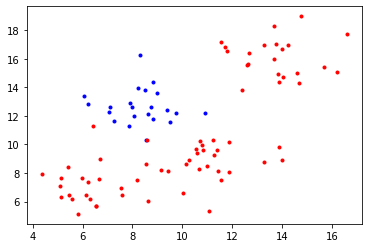

In [2]:
[X_train, y_train, X_test, y_test] = np.load('TP4.npy',allow_pickle=True)
print("X_train.shape = ", X_train.shape )
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ",y_test.shape)
print("La dimension des datas [Train+Test]: 120")
print("******************************************\n")

# Classificatio binaire : same as TP3
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))
#Pixel non peau
F_train = X_train[np.where(y_train==0),:]
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))

print("T_train.shape = ",T_train.shape, "#Pixel True : peau : Deux composantes Cb et Cr")
print("F_train.shape = ",F_train.shape , "#Pixel  False : Non peau  : Deux composantes Cb et Cr")
print("******************************************\n")

plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.show
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show


## **II. Estimation des densités de probabilité:**

Ecrire une fonction ddp_parzen(𝒙,𝑿, 𝑪𝒐𝒗) qui estime la densité de probabilité en un point 𝒙 à
partir des points de la base d’apprentissage 𝑿, en utilisant un noyau 2D gaussien. On utilisera
une matrice de covariance diagonale avec un écart type  identique pour les deux dimensions.
On pourra utiliser la fonction norm2() développée au TP3.

In [3]:
𝑚Cb = np.mean(T_train[:,0])    # moyennes et écarts-type de la composante Cb
𝑚Cr = np.mean(T_train[:,1])    # moyennes et écarts-type de la composante Cr

𝜎Cb = np.std(T_train[:,0])     # écarts-type de la composante Cb
𝜎Cr = np.std(T_train[:,1])     # écarts-type de la composante Cr
print("****************************")
print("Les moyennes :\n𝑚Cb = ", 𝑚Cb, "\n𝑚Cr = ",𝑚Cr,"\nLes écarts-types :\n𝜎Cb = ",𝜎Cb,"\n𝜎Cr = ",𝜎Cr  )
print("****************************")

# Calcul de la matrice de covariance des points chaire peau
Sigma = np.cov(np.transpose(F_train))
print("La matrice de Covariance: \n",Sigma)


****************************
Les moyennes :
𝑚Cb =  10.410166628218883 
𝑚Cr =  10.659179155067964 
Les écarts-types :
𝜎Cb =  3.2571959424455033 
𝜎Cr =  4.042314473899821
****************************
La matrice de Covariance: 
 [[ 1.29021046 -0.12672624]
 [-0.12672624  1.5211322 ]]


**Questions:**
Rappeler le principe de fonctionnement de l’estimation de densité de probabilité par noyau.
Que représente le noyau ?

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

Let (x1, x2, ..., xn) be independent and identically distributed samples drawn from some univariate distribution with an unknown density ƒ at any given point x. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is

where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth. A kernel with subscript h is called the scaled kernel and defined as Kh(x) = 1/h K(x/h). Intuitively one wants to choose h as small as the data will allow; however, there is always a trade-off between the bias of the estimator and its variance. The choice of bandwidth is discussed in more detail below.


**None parametric way** : cela signifie que nous ne supposons aucune distribition sous-jacente pour nos données, par exemple, nous ne supposons pas que nos données viennent d'une gaussienne, et donc nous n'avons pas de moyenne et d'écarts types à ajuster. 

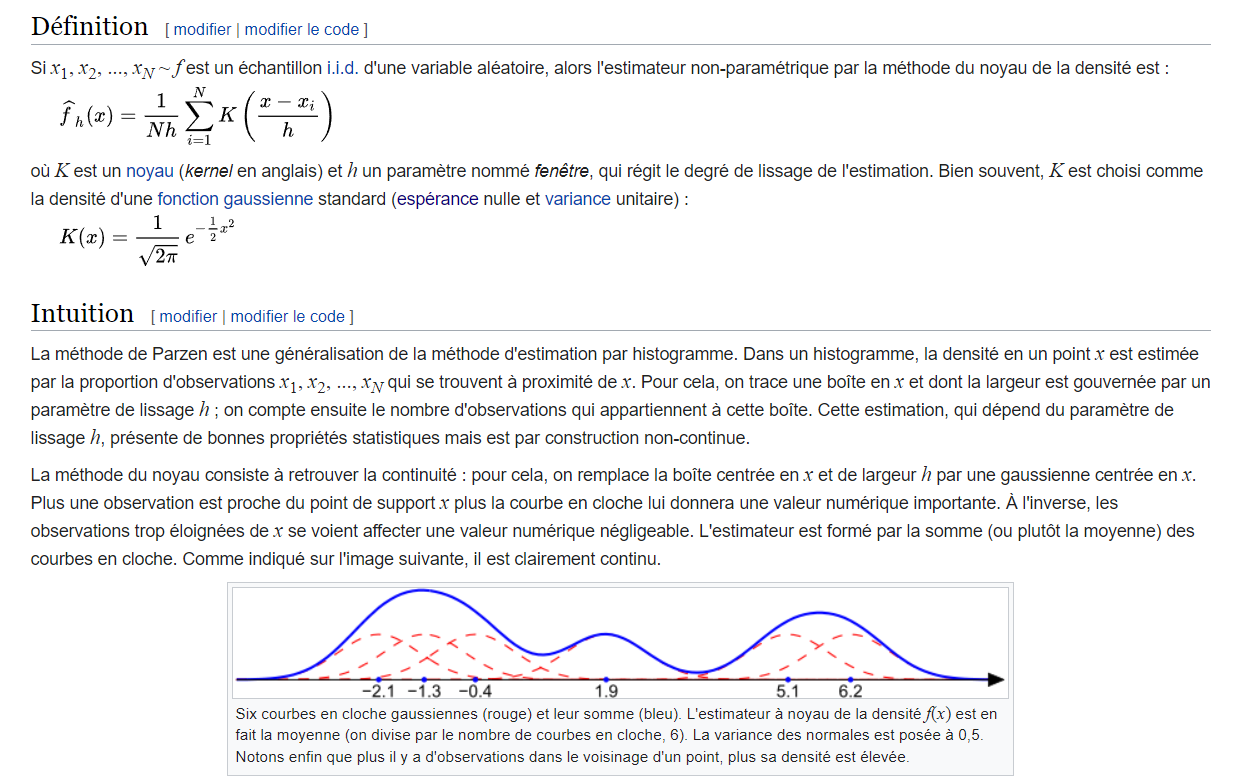

In [6]:
# Fonction qui renvoie la probabilité en un point x
def norm2(x, m, cov):
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p
# estime la densité de probabilité en un point 𝒙 à partir des points de la base d’apprentissage 
def ddp_parzen(x,X, Cov):
  somme = sum(norm2(x,Xi, Cov) for Xi in X )
  return  somme/X.shape[0]
s = 2
# Choix de la matrice de covariance
Cov = np.array([[s*s, 0],[0,s*s]])
print("cov = \n", Cov)


cov = 
 [[4 0]
 [0 4]]


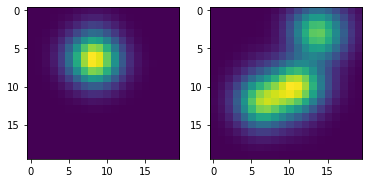

In [7]:
p0 = np.zeros((20,20))
p1 = np.zeros((20,20))
for i in range(20):
  for j in range(20):  
          p0[j,i] = ddp_parzen(np.transpose([i,j]),F_train, Cov)
          p1[j,i] = ddp_parzen(np.transpose([i,j]),T_train, Cov)
plt.figure()
plt.subplot(1,2,1); plt.imshow(np.flipud(p0))
plt.subplot(1,2,2); plt.imshow(np.flipud(p1))

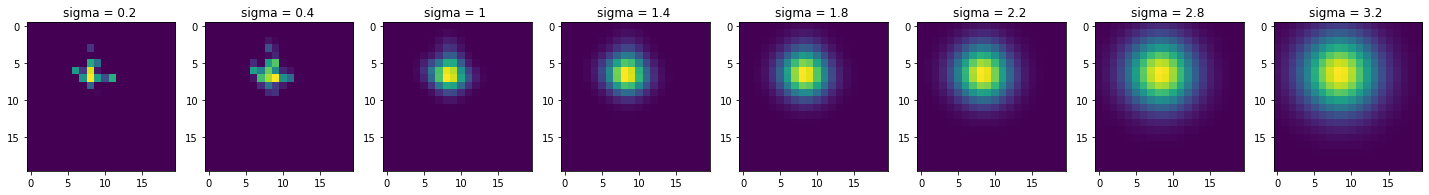

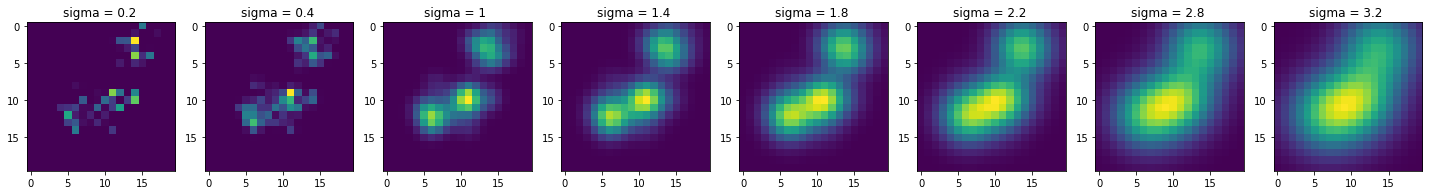

In [15]:
sigma = [0.2,0.4,1,1.4,1.8,2.2,2.8,3.2]
fig = plt.figure(figsize = (25,7))
for index,s in enumerate(sigma):
  for i in range(20):
    for j in range(20):  
          p0[j,i] = ddp_parzen(np.transpose([i,j]),F_train, np.array([[s*s, 0],[0,s*s]]))
          p1[j,i] = ddp_parzen(np.transpose([i,j]),T_train, np.array([[s*s, 0],[0,s*s]]))
  plt.subplot(2,len(sigma),index+1) ; plt.imshow(np.flipud(p0)); plt.title("sigma = {} ".format(s))

fig = plt.figure(figsize = (25,7))
for index,s in enumerate(sigma):
  for i in range(20):
    for j in range(20):  
          p0[j,i] = ddp_parzen(np.transpose([i,j]),F_train, np.array([[s*s, 0],[0,s*s]]))
          p1[j,i] = ddp_parzen(np.transpose([i,j]),T_train, np.array([[s*s, 0],[0,s*s]]))
  plt.subplot(2,len(sigma),index+1); plt.imshow(np.flipud(p1)) ; plt.title("sigma = {} ".format(s))

A priori et sans faire le test,
LA  valeur de sigma que je pense adéquate pour faire la classification est sigma = 1

## **III. Classification bayésienne**

**DDP à priori de chaque classe binaire**



In [ ]:
print("DDP à priori de C1 : P1 = ",T_train.shape[0]/X_train.shape[0])  #Le nombre de pixel C1/ nombre de pixel total
print("DDP à priori de C0 : P0 = ",F_train.shape[0]/X_train.shape[0])  #Le nombre de pixel C0/ nombre de pixel total

DDP à priori de C0 : P0 =  0.7555555555555555
DDP à priori de C1 : P1 =  0.24444444444444444


Réaliser la classification des points 𝒙 de la base de test en utilisant la règle de bayes

$𝐶 = 𝑎𝑟𝑔max_i [𝑝(𝐶𝑖/𝒙)] = 𝑎𝑟𝑔max_i[ddp\_parzen(𝒙,𝑿𝑖, 𝑪𝒐𝒗∗Pi)] $

Où 𝑿𝑖 est l’ensemble des exemples d’apprentissage de la classe Ci

**Calcul de la DDP des exemples de test**

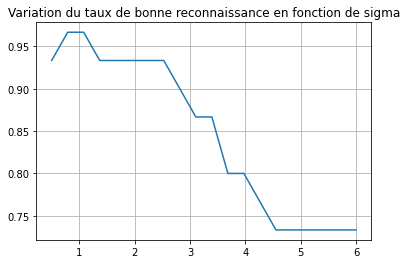

In [ ]:
# Densités à priori des classses
p_C1 = T_train.shape[0]/X_train.shape[0]
p_C0 = F_train.shape[0]/X_train.shape[0]

sigmaTab = np.linspace(start=0.5,stop=6,num=20)
#sigmaTab = [1] # test

# Calcul des DDP des x exemples de test
p0_test, p1_test = [],[]
# Taub de bonne reconnaissance
accuracy = np.zeros(len(sigmaTab))
# Stocker les matrices de confusions

for indx,sigma in enumerate(sigmaTab):
    cov = (sigma**2)*np.eye(2)

    y_predict=np.zeros(X_test.shape[0])
    for i,xi in enumerate(X_test):
        p0_test = ddp_parzen(xi,F_train,cov)  #vraissemblance p(x|y= C0)
        p1_test = ddp_parzen(xi,T_train, cov) #vraissemblance p(x|y= C1)

        # Probabilités à postériori
        p0_aposteriori = p0_test * p_C0   # p(y=C0 |x)
        p1_aposteriori = p1_test * p_C1   # p(y=C1 |x)
        # Classification :  Régle du maximum à posteriori

        if p1_aposteriori > p0_aposteriori:
          y_predict[i] = 1   
        else: 
          y_predict[i] = 0  # Or do nothing

    conf_matrix = confusion_matrix(y_test,y_predict)
    # Taut de bonne reconnaissance
    accuracy[indx]=np.sum(np.diag(conf_matrix))/np.sum(conf_matrix)
    #print(sigma, accuracy[indx])

plt.plot(sigmaTab,accuracy)
plt.title("Variation du taux de bonne reconnaissance en fonction de sigma")
plt.grid()
plt.show()

Afficher le taux de reconnaissance. Faire varier  et optimiser le taux de reconnaissance.
Questions
Pour quelle valeur de  obtient-on la meilleure classification ? Etait-ce prévisible ? Expliquer
le résultat.